# Machine Learning and Data Mining COMM055
_____________________________________________________

**Student Name: Sina Ghasemizadeh**

**Student Number: 6846252**

**Selected Dataset: Airplane Passengers Satisfaction**

**Machine Learning Approach: Clustering**

## Data Understanding and Exploration

The Airplane Passengers Satisfaction dataset, provided by Kaggle, contains surveys from passengers along with some of their information such as age, gender, and more. In addition to these features, passengers have also provided their overall satisfaction, giving us the opportunity to investigate passenger satisfaction using different machine learning algorithms. In this section, we will take a closer look at the dataset to become more familiar with its features.

In [33]:
import pandas as pd

file_path = 'satisfaction.csv'
data = pd.read_csv(file_path)


In [34]:
print( 'Shape of Dataset: ' , data.shape)  
print(data.dtypes)

Shape of Dataset:  (129880, 24)
id                                     int64
satisfaction_v2                       object
Gender                                object
Customer Type                         object
Age                                    int64
Type of Travel                        object
Class                                 object
Flight Distance                        int64
Seat comfort                           int64
Departure/Arrival time convenient      int64
Food and drink                         int64
Gate location                          int64
Inflight wifi service                  int64
Inflight entertainment                 int64
Online support                         int64
Ease of Online booking                 int64
On-board service                       int64
Leg room service                       int64
Baggage handling                       int64
Checkin service                        int64
Cleanliness                            int64
Online boarding        

The dataset has 129,880 rows and 24 columns, containing different data types as observed. To better understand each feature, the table below is provided based on the dataset description from Kaggle, explaining each feature:


| Feature                          | Description                                                                                 |
|----------------------------------|---------------------------------------------------------------------------------------------|
| Gender                           | Gender of the passengers (Female, Male)                                                    |
| Customer Type                    | The customer type (Loyal customer, disloyal customer)                                      |
| Age                              | The actual age of the passengers                                                           |
| Type of Travel                   | Purpose of the flight of the passengers (Personal Travel, Business Travel)                |
| Class                            | Travel class in the plane of the passengers (Business, Eco, Eco Plus)                     |
| Flight Distance                  | The flight distance of this journey                                                       |
| Inflight Wifi Service            | Satisfaction level of the inflight wifi service (0: Not Applicable; 1-5)                  |
| Departure/Arrival Time Convenient| Satisfaction level of Departure/Arrival time convenient                                    |
| Ease of Online Booking           | Satisfaction level of online booking                                                      |
| Gate Location                    | Satisfaction level of Gate location                                                       |
| Food and Drink                   | Satisfaction level of Food and drink                                                      |
| Online Boarding                  | Satisfaction level of online boarding                                                     |
| Seat Comfort                     | Satisfaction level of Seat comfort                                                        |
| Inflight Entertainment           | Satisfaction level of inflight entertainment                                              |
| On-board Service                 | Satisfaction level of On-board service                                                   |
| Leg Room Service                 | Satisfaction level of Leg room service                                                   |
| Baggage Handling                 | Satisfaction level of baggage handling                                                   |
| Check-in Service                 | Satisfaction level of Check-in service                                                   |
| Inflight Service                 | Satisfaction level of inflight service                                                   |
| Cleanliness                      | Satisfaction level of Cleanliness                                                        |
| Departure Delay in Minutes       | Minutes delayed when departure                                                           |
| Arrival Delay in Minutes         | Minutes delayed when arrival                                                             |
| Satisfaction                     | Airline satisfaction level (Satisfaction, neutral or dissatisfaction)                    |


Below, we visualize some features related to the customers, such as the distribution of Age, Gender, Customer Type, and Type of Travel, to gain a better understanding of the dataset.

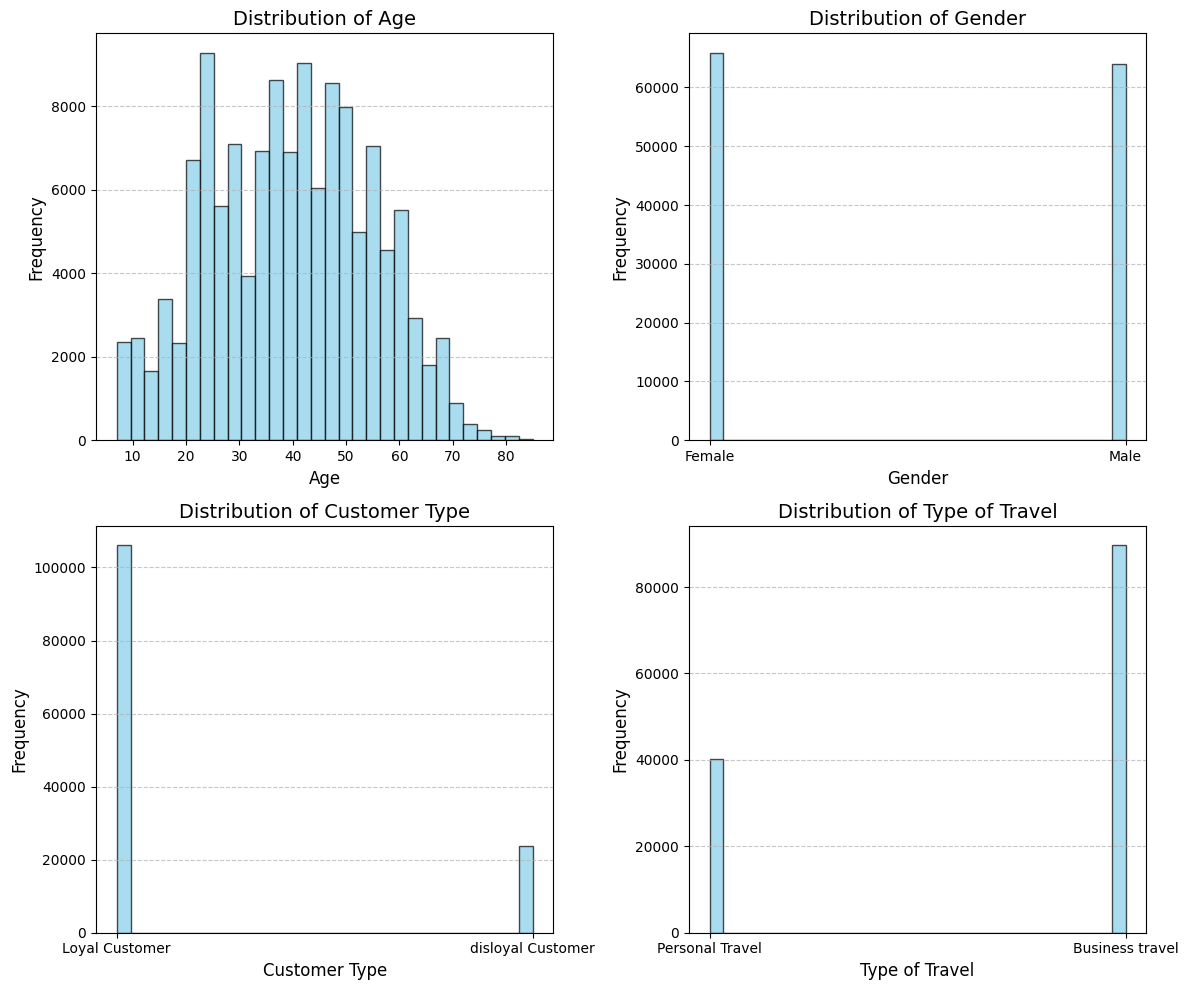

In [35]:
import matplotlib.pyplot as plt

Pass_columns = ['Age', 'Gender', 'Customer Type', 'Type of Travel']

fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.flatten()

for i, column in enumerate(Pass_columns):
    axes[i].hist(data[column], bins=30, color='skyblue', edgecolor='black', alpha=0.7)
    axes[i].set_title(f"Distribution of {column}", fontsize=14)
    axes[i].set_xlabel(column, fontsize=12)
    axes[i].set_ylabel("Frequency", fontsize=12)
    axes[i].grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.savefig('distribution_analysis.png', dpi=300, bbox_inches='tight')
plt.show()


As we can see, the passengers' ages range from below 10 to over 80 years old, with most customers falling between the ages of 20 and 60. The dataset appears to have a good balance between male and female genders. Additionally, most passengers are likely loyal customers and primarily traveling for business, as indicated by the charts above.


Now, we take a look at customer satisfaction to see how it is distributed.

/tmp/ipykernel_2901231/3307976605.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=gender_counts.index, y=gender_counts.values, palette="pastel")


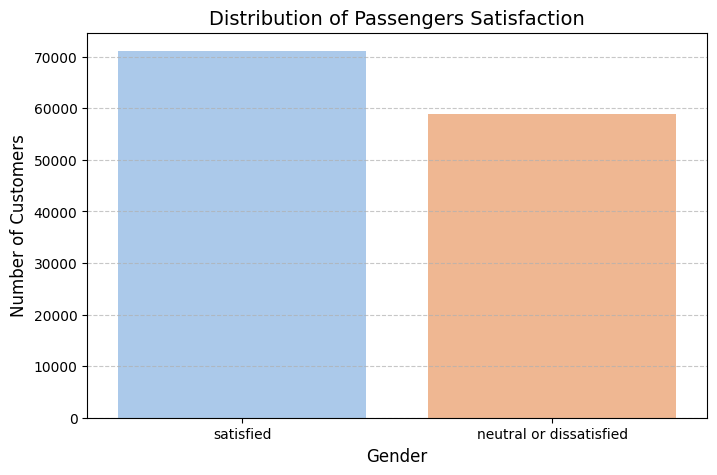

In [36]:
import seaborn as sns


# here, We renamed the column to make it more intuitive.
data.rename(columns={'satisfaction_v2': 'Satisfaction'}, inplace=True)
gender_counts = data['Satisfaction'].value_counts()

plt.figure(figsize=(8, 5))
sns.barplot(x=gender_counts.index, y=gender_counts.values, palette="pastel")
plt.title("Distribution of Passengers Satisfaction", fontsize=14)
plt.xlabel("Gender", fontsize=12)
plt.ylabel("Number of Customers", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


As we can see, the dataset is nearly balanced in terms of customer satisfaction, with 'Satisfied' being slightly more prevalent.

In [37]:
print (data.columns)

Index(['id', 'Satisfaction', 'Gender', 'Customer Type', 'Age',
       'Type of Travel', 'Class', 'Flight Distance', 'Seat comfort',
       'Departure/Arrival time convenient', 'Food and drink', 'Gate location',
       'Inflight wifi service', 'Inflight entertainment', 'Online support',
       'Ease of Online booking', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Cleanliness', 'Online boarding',
       'Departure Delay in Minutes', 'Arrival Delay in Minutes'],
      dtype='object')


To take a deeper look, we will visualize the customer age trend, separating satisfied and unsatisfied customers.

Satisfaction
1    71087
0    58793
Name: count, dtype: int64


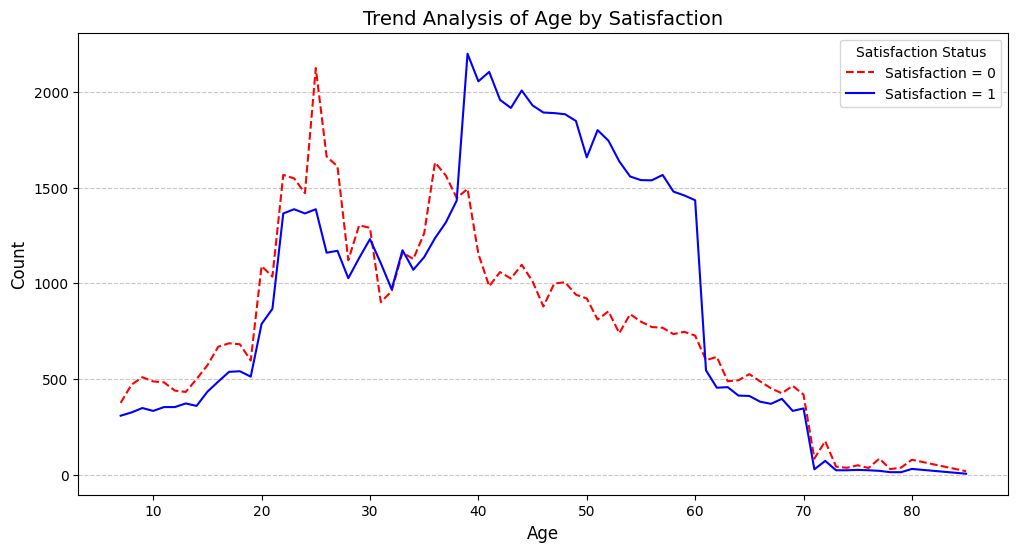

In [38]:

# Feature to analyze
feature = 'Age'
data['Satisfaction'] = data['Satisfaction'].map({'neutral or dissatisfied': 0, 'satisfied': 1})
# Group data by the feature and satisfaction status
grouped = data.groupby([feature, 'Satisfaction']).size().unstack(fill_value=0)

# Ensure column names are integers
grouped.columns = grouped.columns.astype(int)

print(data['Satisfaction'].value_counts())
# Plotting
plt.figure(figsize=(12, 6))
plt.plot(grouped.index, grouped[0], label='Satisfaction = 0', color='red', linestyle='--')
plt.plot(grouped.index, grouped[1], label='Satisfaction = 1', color='blue')
plt.title(f"Trend Analysis of {feature} by Satisfaction", fontsize=14)
plt.xlabel(feature.capitalize(), fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.legend(title="Satisfaction Status", fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


As indicated in the chart, across different ages from 10 to around 40, overall, dissatisfied customers tend to slightly outnumber satisfied customers. However, from ages 40 to 60, this trend reverses, with customers in this age group generally being more satisfied with the company, showing a significantly higher count. After age 60, the trend shifts back to its initial state.

## Data Preprocessing

Now we move on to the data preprocessing stage. First, we will identify the columns that contain null values, and then we will remove them.

In [39]:

print(data.isnull().sum())
data = data.dropna()  



id                                     0
Satisfaction                           0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Seat comfort                           0
Departure/Arrival time convenient      0
Food and drink                         0
Gate location                          0
Inflight wifi service                  0
Inflight entertainment                 0
Online support                         0
Ease of Online booking                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Cleanliness                            0
Online boarding                        0
Departure Delay in Minutes             0
Arrival Delay in Minutes             393
dtype: int64


In [40]:
data_cor = data[['Seat comfort',
       'Departure/Arrival time convenient', 'Food and drink', 'Gate location',
       'Inflight wifi service', 'Inflight entertainment', 'Online support',
       'Ease of Online booking', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Cleanliness', 'Online boarding']]

Here, we will examine how the survey columns in the dataset are correlated with each other.

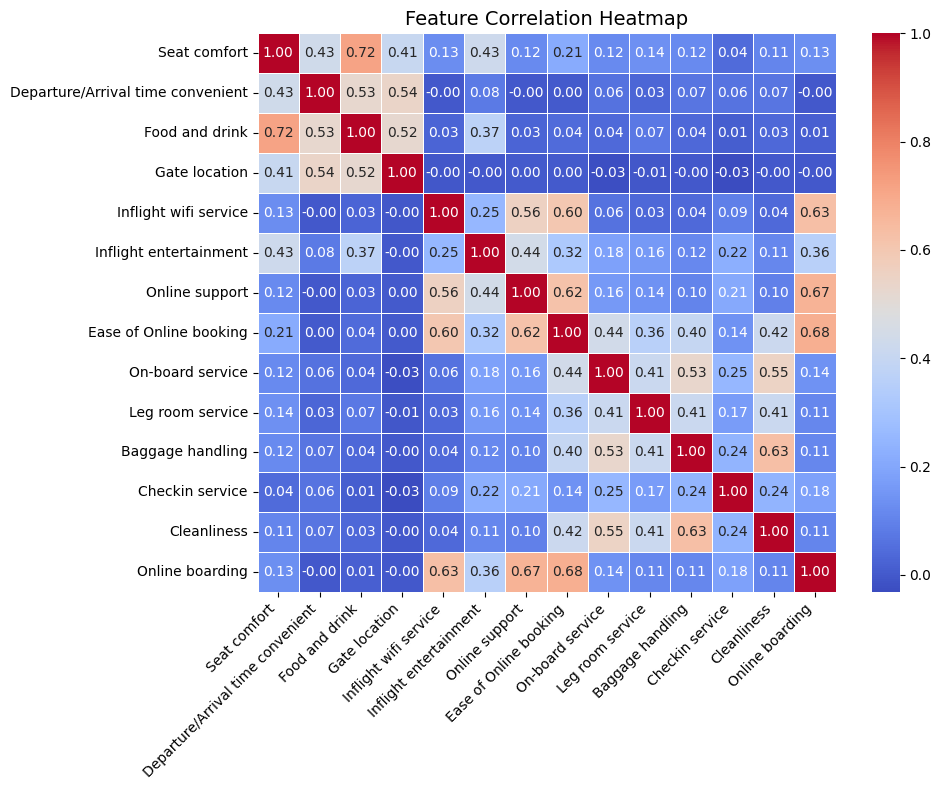

In [41]:
import pandas as pd


# Compute the correlation matrix
correlation_matrix = data_cor.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap", fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()



Overall, as we can see, there is no significant correlation between most features, except for a few, such as Ease of Online Booking and Online Support (0.68), Inflight Wifi Service and Online Support (0.60), and Food and Drink and Seat Comfort (0.72). Some of these correlations, like the one between Food and Drink and Seat Comfort, may not make much sense in the real world or could be influenced by other factors we are not aware of. In the end, we will not remove any features at this stage, as we intend to use PCA, which will handle data redundancy automatically.

We removed the Satisfaction column from the data as we will use PCA in the next step. Since clustering is an unsupervised learning method, we do not need the ground truth for training the model; it will only be used for evaluation purposes.

In [42]:
true_labels = data['Satisfaction']  
data = data.drop(['Satisfaction','id'], axis=1)

Next, we will transform the categorical columns using one-hot encoding to handle the categorical data effectively.

In [43]:
data = pd.get_dummies(data, drop_first=True)

We will standardize the dataset by scaling each feature to have a mean of 0 and a standard deviation of 1, ensuring all features are on the same scale. This step is also crucial for applying PCA effectively.

In [44]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

Now we will reduce the data's dimensions using PCA.

In [45]:
from sklearn.decomposition import PCA
def reduced_data_dim(r):
    if r == 24: 
        return scaled_data
    pca = PCA(n_components=r)
    reduced_data = pca.fit_transform(scaled_data)
    return reduced_data

Finally, we move on to the modeling part. Here, we will use K-Means to train the model. The code in this section is adapted from Lab 5 with some minor changes.

In [46]:
from time import time
from sklearn.cluster import KMeans
from sklearn import metrics
import numpy as np


# Parameters for clustering
n_clusters = len(np.unique(true_labels))  # Number of clusters based on unique satisfaction values
sample_size = 300


# K-Means with reduced data
def bench_k_means(estimator, name, data):
    t0 = time()
    estimator.fit(data)
    print('init\t\tfeat\ttime\tinertia\thomo\tcompl\tv-meas\tARI\tAMI\tsilhouette')
    print('%-9s\t%i\t%.2fs\t%i\t%.3f\t%.3f\t%.3f\t%.3f\t%.3f\t%.3f'
          % (name, data.shape[1], (time() - t0), estimator.inertia_,
             metrics.homogeneity_score(true_labels, estimator.labels_),
             metrics.completeness_score(true_labels, estimator.labels_),
             metrics.v_measure_score(true_labels, estimator.labels_),
             metrics.adjusted_rand_score(true_labels, estimator.labels_),
             metrics.adjusted_mutual_info_score(true_labels, estimator.labels_),
             metrics.silhouette_score(data, estimator.labels_, metric='euclidean', sample_size=sample_size)))
    

for i in range(24, 0, -1):
    print(f"\n-------------- Metrics For r={i} -------------------")
    print(82 * "_")

    bench_k_means(KMeans(init='k-means++', n_clusters=n_clusters, n_init=20, random_state=42),
                name="k-means++", data=reduced_data_dim(i))




-------------- Metrics For r=24 -------------------
__________________________________________________________________________________
init		feat	time	inertia	homo	compl	v-meas	ARI	AMI	silhouette
k-means++	23	3.28s	2606110	0.217	0.219	0.218	0.291	0.218	0.134

-------------- Metrics For r=23 -------------------
__________________________________________________________________________________
init		feat	time	inertia	homo	compl	v-meas	ARI	AMI	silhouette
k-means++	23	3.25s	2606110	0.217	0.219	0.218	0.291	0.218	0.122

-------------- Metrics For r=22 -------------------
__________________________________________________________________________________
init		feat	time	inertia	homo	compl	v-meas	ARI	AMI	silhouette
k-means++	22	3.10s	2601620	0.217	0.219	0.218	0.291	0.218	0.124

-------------- Metrics For r=21 -------------------
__________________________________________________________________________________
init		feat	time	inertia	homo	compl	v-meas	ARI	AMI	silhouette
k-means++	21	3.11s	2578

As the number of dimensions (r) decreases, the silhouette score improves significantly, indicating better-defined cluster separations, with the highest value of 0.585 at r=1. However, the homogeneity, completeness, V-measure, ARI, and AMI remain largely consistent, suggesting the clustering structure is stable across dimensional reductions. The inertia decreases as expected, reflecting tighter clusters in lower-dimensional spaces.

Now we will plot the decision boundaries using 2D PCA to observe how the data is separated into classes. We will also use the ground truth for each data point, assigning different colors to different classes to identify which data points have been clustered correctly.

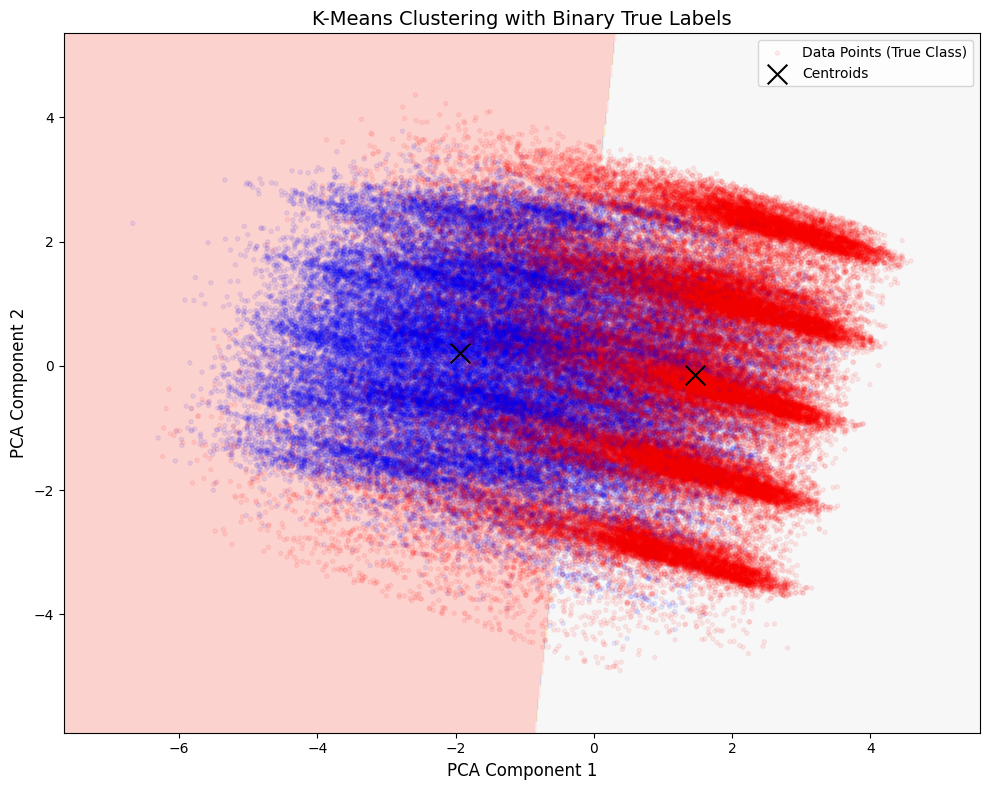

In [47]:



reduced_data = reduced_data_dim(2)

# Apply K-Means clustering
n_clusters = len(np.unique(true_labels))  # Assuming two clusters based on true labels
kmeans = KMeans(init='k-means++', n_clusters=n_clusters, n_init=10, random_state=42)
kmeans.fit(reduced_data)

# Decision boundary (mesh grid)
h = 0.02  # Step size for the mesh grid
x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Create the plot
plt.figure(figsize=(10, 8))

# Plot the cluster regions with custom colors
plt.contourf(xx, yy, Z, alpha=0.6, cmap="Pastel1")  # Custom background colormap

# Scatter plot with true labels (binary colors)
plt.scatter(
    reduced_data[:, 0],
    reduced_data[:, 1],
    c=true_labels,  # Use true labels for color
    cmap="bwr",  # Binary colormap (blue for one class, red for the other)
    s=9,  # Point size
    alpha=0.07,  # Slight transparency
    label='Data Points (True Class)'
)

# Plot the centroids
centroids = kmeans.cluster_centers_
plt.scatter(
    centroids[:, 0],
    centroids[:, 1],
    marker='x',
    s=200,
    c='black',
    label='Centroids'
)

# Titles and labels
plt.title("K-Means Clustering with Binary True Labels", fontsize=14)
plt.xlabel("PCA Component 1", fontsize=12)
plt.ylabel("PCA Component 2", fontsize=12)
plt.legend(loc="upper right")
plt.tight_layout()

# Remove the colorbar
plt.show()


as we can the data has beesn splitted in two different clusters, in pink and white areas, but by taking the look at data points colors which represent their lable (satisfied or dissatified) we will see that the achived boundrie for two clusters can not sprate data based on its label very well, so the K means may not be a good apprach for this data set.

We can also check this using 3D PCA, hoping that having a higher dimension might result in better clustering of the data.

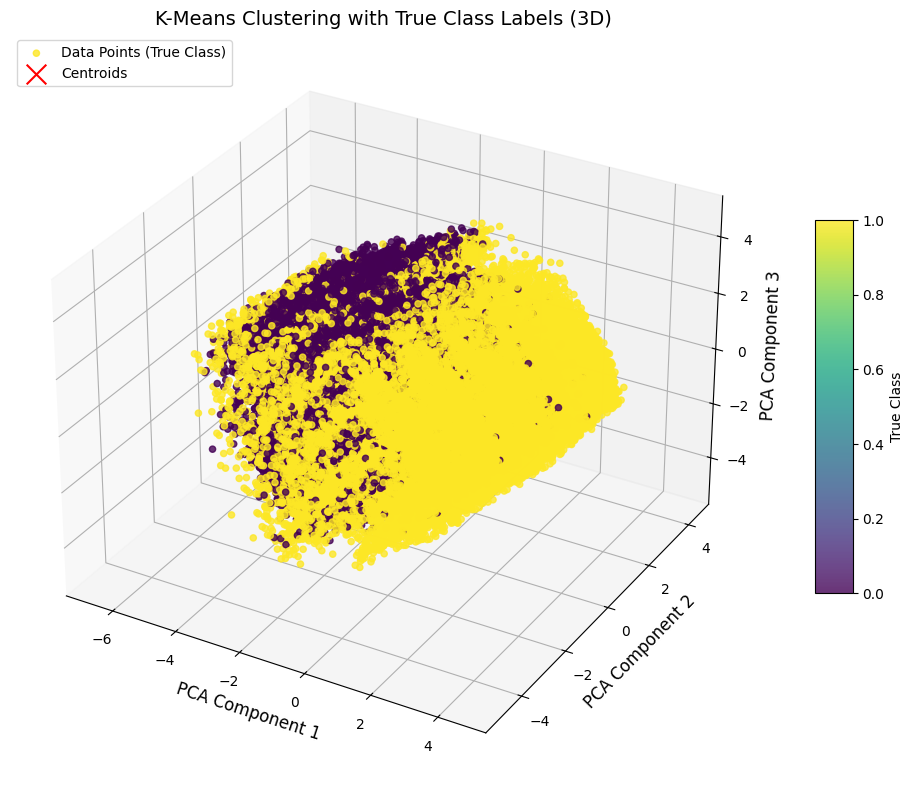

In [48]:
# Assuming reduced_data contains PCA-reduced data (3D)
reduced_data_3d = reduced_data_dim(3)  # Ensure this function or data provides 3D PCA-reduced data

# Apply K-Means clustering
n_clusters = len(np.unique(true_labels))  # Assuming true labels are available
kmeans = KMeans(init='k-means++', n_clusters=n_clusters, n_init=10, random_state=42)
kmeans.fit(reduced_data_3d)

# Create a 3D scatter plot
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot with true labels as colors
scatter = ax.scatter(
    reduced_data_3d[:, 0],
    reduced_data_3d[:, 1],
    reduced_data_3d[:, 2],
    c=true_labels,  # True labels determine the point colors
    cmap='viridis',
    s=20,  # Point size
    alpha=0.8,  # Slight transparency
    label='Data Points (True Class)'
)

# Add cluster centroids
centroids = kmeans.cluster_centers_
ax.scatter(
    centroids[:, 0],
    centroids[:, 1],
    centroids[:, 2],
    marker='x',
    s=200,
    c='red',
    label='Centroids'
)

# Add titles and labels
ax.set_title("K-Means Clustering with True Class Labels (3D)", fontsize=14)
ax.set_xlabel("PCA Component 1", fontsize=12)
ax.set_ylabel("PCA Component 2", fontsize=12)
ax.set_zlabel("PCA Component 3", fontsize=12)
fig.colorbar(scatter, label="True Class", shrink=0.5, aspect=10)

# Add a legend
ax.legend(loc="upper left")
plt.tight_layout()
plt.show()



However, as we can see, there is still no indication of successfully splitting the data into two classes in a proper way.